# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Зчитую дані з файлу у датафрейм


In [2]:
df = pd.read_csv('clean_data_lab.csv')
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>'Population'</li>
    <li>'Area'</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [3]:
from sklearn.linear_model import LinearRegression

Y = df[['CO2 emission']]

Yhat1 = LinearRegression()
Yhat1.fit(df[['Population']], Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [4]:
print('Перетин (a): ', Yhat1.intercept_[0])
print('Нахил:  (b): ', Yhat1.coef_[0][0])

Перетин (a):  -782.8642515405663
Нахил:  (b):  0.004833467584944404


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

$$
Yhat1 = -782.8642515405663 + 0.004833467584944404 * X
$$

$$
CO2 emission = -782.8642515405663 + 0.004833467584944404  * Population
$$

Створюю об’єкт лінійної регресії та навчаю другу модель


In [5]:
Yhat2 = LinearRegression()
Yhat2.fit(df[['Area']], Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [6]:
print('Перетин (a): ', Yhat2.intercept_[0])
print('Нахил:  (b): ', Yhat2.coef_[0][0])

Перетин (a):  4533.358195114823
Нахил:  (b):  0.2594849962672649


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


$$
Yhat2 = 4533.358195114823 + 0.2594849962672649 * X
$$

$$
CO2 emission = 4533.358195114823 + 0.2594849962672649  * Area
$$

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [7]:
Yhat3 = LinearRegression()
Yhat3.fit(df[['Population','Area']], Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [8]:
print('Перетин (a): ', Yhat3.intercept_[0])
print('Нахил  (b1): ', Yhat3.coef_[0][0])
print('Нахил  (b2): ', Yhat3.coef_[0][1])

Перетин (a):  -51153.70055281368
Нахил  (b1):  0.004070867890722972
Нахил  (b2):  0.12369061992486784


Підставляючи фактичні значення, маємо:

$$
Yhat3 = -51153.70055281368 + 0.004070867890722972 * X_1 + 0.12369061992486784 X_2
$$

$$
CO2emission = -51153.70055281368 + 0.004070867890722972 * Population + 0.12369061992486784 * Area
$$

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [9]:
y = df['CO2 emission']
x1 = df['Population']
x2 = df['Area']

Yhat4 = np.polyfit(x1,y, 2)
p = np.poly1d(Yhat4) 
print(p)

            2
-3.004e-13 x + 0.00521 x - 7948


Знаходжу коефіцієнти моделі


In [10]:
print("Коефіцієнти полінома:")
print("a  = ", Yhat4[2])
print("b1 = ", Yhat4[1])
print("b2 = ", Yhat4[0])

Коефіцієнти полінома:
a  =  -7948.175265662439
b1 =  0.005210020241733402
b2 =  -3.003997685003578e-13


Підставляючи фактичні значення, маємо:
$$
Yhat4 = -7948.175265662439 + 0.005210020241733402 * X_1 + -3.003997685003578e-13 * X_1^2
$$
$$
CO2emission = -7948.175265662439 + 0.005210020241733402 * Population + -3.003997685003578e-13 * Population^2
$$

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [11]:
Yhat5 = np.polyfit(x2,y, 2)
p = np.poly1d(Yhat5) 
print(p)

            2
-1.484e-08 x + 0.436 x - 4.963e+04


Знаходжу коефіцієнти моделі


In [12]:
print("Коефіцієнти полінома:")
print("a  = ", Yhat5[2])
print("b1 = ", Yhat5[1])
print("b2 = ", Yhat5[0])

Коефіцієнти полінома:
a  =  -49626.50221757583
b1 =  0.4359534096337656
b2 =  -1.484320925856018e-08


Підставляючи фактичні значення, маємо:
$$
Yhat5 = -49626.50221757583 + 0.4359534096337656 * X_2 + -1.484320925856018e-08 * X_2^2
$$
$$
CO2emission = -49626.50221757583 + 0.4359534096337656 * Area + -1.484320925856018e-08 * Area^2
$$

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Можемо виконати поліноміальне перетворення на кількох об’єктах.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
pr=PolynomialFeatures(degree=2, include_bias = False)
pr

PolynomialFeatures(include_bias=False)

In [15]:
Z = df[['Population','Area']]
Z_pr=pr.fit_transform(Z) 

In [16]:
Z.shape

(217, 2)

У вихідних даних 217 спостережень та 2 ознаки

In [17]:
Z_pr.shape

(217, 5)

Після трансформації маємо 217 спостережень та 6 ознак

In [18]:
Yhat6 = LinearRegression()
Yhat6.fit(Z_pr, Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [19]:
a = Yhat6.intercept_
b = Yhat6.coef_ 

print('a  = ', a[0])

for i in range(len(b[0])):
    print(f'b{i+1} = ', b[0][i])

a  =  13674.58756010572
b1 =  0.0022697256876124455
b2 =  0.021920418380169244
b3 =  -3.1105811167557696e-12
b4 =  1.020113403090381e-09
b5 =  -4.1060983391364455e-09


Підставляючи фактичні значення, маємо:
$$
Yhat6 = 13674.58756010572 + 0.0022697256876124455 * X_1 +  0.021920418380169244 * X_2 -3.1105811167557696e-12 * X_1 X_2 + 1.020113403090381e-09 * X_1^2 -4.1060983391364455e-09 * X_2^2
$$

$$
CO2emission = 13674.58756010572 + 0.0022697256876124455 * Population +  0.021920418380169244 * Area -3.1105811167557696e-12 * Population * Area + 1.020113403090381e-09 * Population^2 -4.1060983391364455e-09 * Area^2
$$

<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


In [20]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Population', ylabel='CO2 emission'>

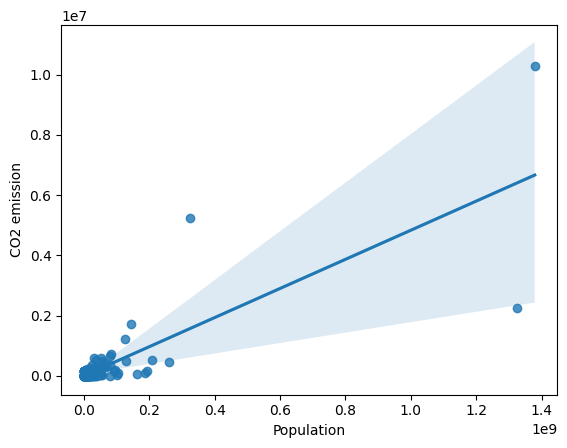

In [21]:
sns.regplot(x='Population', y='CO2 emission', data=df)

На цьому графіку бачимо, що кількість населення позитивно корелює з рівнем викидів CO2, оскільки нахил регресії є позитивним

<Axes: xlabel='Area', ylabel='CO2 emission'>

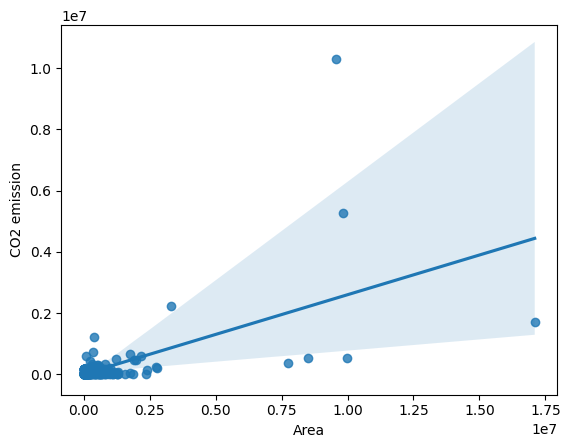

In [22]:
sns.regplot(x='Area', y='CO2 emission', data=df)

На цьому графіку бачимо, що площа позитивно корелює з рівнем викидів CO2, оскільки нахил регресії є позитивним

Для візуалізації дисперсії даних використаю діаграми залишків.


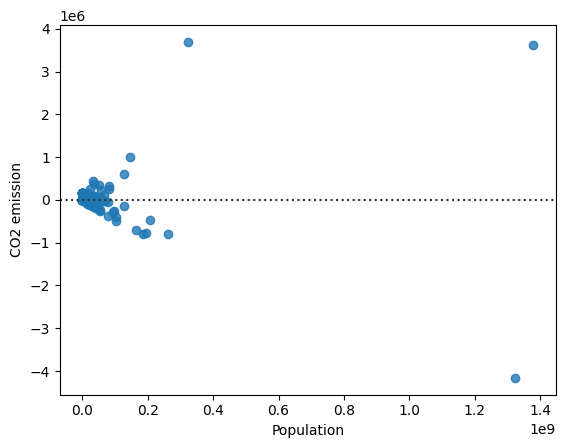

In [23]:
sns.residplot(x=x1, y=y)
plt.show()

<p>На діаграмі залишків бачимо, що залишки не розподілені випадковим чином навколо осі x; тому, можливо, нелінійна модель більш підходить для цих даних.</p>

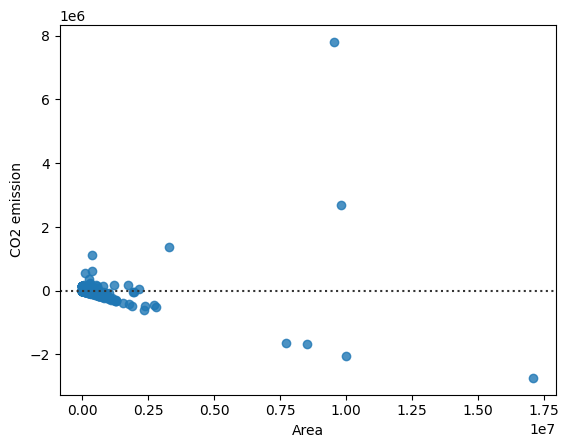

In [24]:
sns.residplot(x=x2, y=y)
plt.show()

<p>На діаграмі залишків бачимо, що залишки не розподілені випадковим чином навколо осі x; тому, можливо, нелінійна модель більш підходить для цих даних.</p>

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


C:\Users\Користувач\AppData\Local\Temp\ipykernel_11820\1499234831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

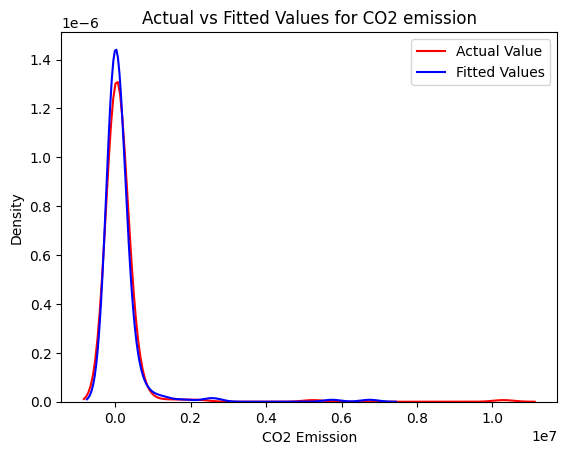

In [25]:
sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")

Yhat_predicted = Yhat3.predict(df[['Population', 'Area']])
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 Emission")
plt.ylabel("Density")

plt.legend()

plt.show()
plt.close()

Бачимо, що підігнані значення досить близькі до фактичних значень, у більшості точок розподіли накладаються, проте є місця, для яких модель варто вдосконалити

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>


In [26]:
print(np.poly1d(Yhat4)) 

            2
-3.004e-13 x + 0.00521 x - 7948


In [27]:
print(np.poly1d(Yhat5)) 

            2
-1.484e-08 x + 0.436 x - 4.963e+04


Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


C:\Users\Користувач\AppData\Local\Temp\ipykernel_11820\3118998148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

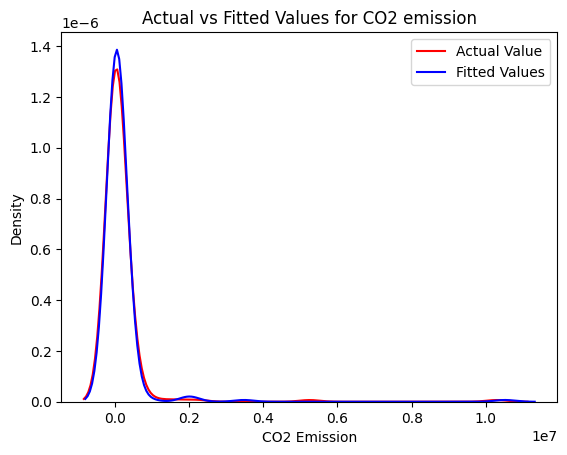

In [28]:
sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")

Yhat_predicted = Yhat6.predict(Z_pr)
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 Emission")
plt.ylabel("Density")

plt.legend()

plt.show()
plt.close()

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


In [29]:
X1 = df[['Population']]
X2 = df[['Area']]
Y = df['CO2 emission']

Модель 1:
$$
Yhat1 = a + b  X
$$


In [30]:
print('The R-square is: ', Yhat1.score(X1, Y))

The R-square is:  0.6435755233131817


Можна сказати, що ~64.36% варіації рівня викидів пояснюється цією простою лінійною моделлю "Population_fit".

In [31]:
Yhat_pred = Yhat1.predict(X1)
print('The output of the first four predicted value is: ',Yhat_pred[0:4,0])

The output of the first four predicted value is:  [166725.94304326  13118.67670299 195485.17184303   -514.12828729]


Імпортуємо функцію <b>mean_squared_error</b> з модуля <b>metrics</b>:

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(Y, Yhat_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  232801816739.9179


Модель 2:
$$
Yhat2 = a + b  X
$$

In [34]:
print('The R-square is: ', Yhat2.score(X2, Y))

The R-square is:  0.34282421100737437


Можна сказати, що ~34.3% варіації рівня викидів пояснюється цією простою лінійною моделлю "Area_fit".

In [35]:
Yhat_pred = Yhat2.predict(X2)
print('The output of the first four predicted value is: ',Yhat_pred[0:4,0])

The output of the first four predicted value is:  [173940.73285816  11993.5518378  622559.15320471   4585.25519437]


In [36]:
mse = mean_squared_error(Y, Yhat_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  429240211045.8939


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [37]:
Z = df[['Population','Area']]
print('The R-square is: ', Yhat3.score(Z, Y))

The R-square is:  0.7054520180118838


Можна сказати, що ~70.05% варіації рівня викидів пояснюється цією множинною лінійною моделлю "Multi_fit".

In [38]:
Y_predict_multifit = Yhat3.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(Y, Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  192386633940.86157


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [46]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

p = np.poly1d(Yhat4) 

r_squared = r2_score(Y, p(x1))
print('The R-square value for Yhat4 is:', r_squared)

The R-square value for Yhat4 is: 0.643890609154327


Можна сказати, що ~64.4% варіації рівня викидів пояснюється цією поліноміально моделлю

In [50]:
print('The mean square error of CO2 emission and predicted value using multifit is:', mean_squared_error(y, p(x1)))

The mean square error of CO2 emission and predicted value using multifit is: 232596015620.61905


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [51]:
p = np.poly1d(Yhat5) 

r_squared = r2_score(Y, p(x2))
print('The R-square value for Yhat5 is:', r_squared)

The R-square value for Yhat5 is: 0.3698523918567883


Можна сказати, що ~37% варіації рівня викидів пояснюється цією поліноміально моделлю

In [59]:
Yhat5_pred = p(x2)
print("Mean Squared Error (MSE) for Yhat5:", mean_squared_error(Y, Yhat5_pred))

Mean Squared Error (MSE) for Yhat5: 411586514354.21747


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [55]:
r_squared = Yhat6.score(Z_pr, Y)
print("R-squared score for Yhat6:", r_squared)

R-squared score for Yhat6: 0.9359013231893688


Можна сказати, що ~93.6% варіації рівня викидів пояснюється цією поліноміально моделлю

In [63]:
Yhat6_pred = Yhat6.predict(Z_pr)

print("Mean Squared Error (MSE) for Yhat6:", mean_squared_error(Y, Yhat6_pred))

Mean Squared Error (MSE) for Yhat6: 41866620808.008255


<h4>Підіб'ємо підсумки </h4>

<p>Simple Linear Regression Model <b>Yhat1</b>: використовує Population як змінну-предиктор для CO2 emission.
<ul>
    <li><b>R-squared:</b> 0.6435755233131817</li>
    <li><b>MSE:</b> 232801816739.9179</li>
</ul>

<p>Simple Linear Regression Model <b>Yhat2</b>: використовує Area як змінну-предиктор для CO2 emission.
<ul>
    <li><b>R-squared:</b> 0.34282421100737437</li>
    <li><b>MSE:</b> 429240211045.8939</li>
</ul>

<p>Multiple Linear Regression Model <b>Yhat3</b>: використовує Population та Area як змінні-предиктори для CO2 emission.
<ul>
    <li><b>R-squared:</b> 0.7054520180118838</li>
    <li><b>MSE:</b> 192386633940.86157</li>
</ul>

<p>Polynomial Fit <b>Yhat4</b>: використовує Population як змінну-предиктор для CO2 emission.
<ul>
    <li><b>R-squared:</b> 0.643890609154327</li>
    <li><b>MSE:</b> 232596015620.61905</li>
</ul>
<p>Polynomial Fit <b>Yhat5</b>: використовує Area як змінну-предиктор для CO2 emission.
<ul>
    <li><b>R-squared:</b> 0.3698523918567883</li>
    <li><b>MSE:</b> 411586514354.21747</li>
</ul>

<p>Multiple Polynomial Fit <b>Yhat6</b>: використовує Population та Area як змінну-предиктор для CO2 emission.
<ul>
    <li><b>R-squared:</b> 0.9359013231893688</li>
    <li><b>MSE:</b> 41866620808.008255</li>
</ul>

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Yhat6 - множинна поліноміальна регресія 2-го ступеня є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних, адже має найкращу комбінацію R-squared і MSE. Його R-squared є найвищим серед усіх моделей, у той же час як MSE є найнижчим серед усіх моделей.</p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей.
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.

# 1) Побудова поліноміальних моделей різних порядків

Ще раз переглянемо кореляційну матрицю

In [98]:
df.corr(numeric_only = True)

,GDP per capita,Population,CO2 emission,Area,Population density
GDP per capita,1.000000,-0.047759,0.089094,0.063861,0.243727
Population,-0.047759,1.000000,0.802232,0.453500,-0.028438
CO2 emission,0.089094,0.802232,1.000000,0.585512,-0.017490
Area,0.063861,0.453500,0.585512,1.000000,-0.064006
Population density,0.243727,-0.028438,-0.017490,-0.064006,1.000000


Будуватимемо поліноміальні регресії для прогнозування площі за населенням та рівнем викидів

In [118]:
y = df['Area']
x1 = df['Population']
x2 = df['CO2 emission']

$$
Yhat7 = a + b_1 X_1 + b_2 X_1^2 + b_3 X_1^3  
$$
$$
Area = a + b_1 * Population + b_2 Population^2 + b_3 Population^3 
$$

In [119]:
Yhat7 = np.polyfit(x1,y, 3)
p7 = np.poly1d(Yhat7) 
print(p7)

           3             2
2.038e-20 x - 4.514e-11 x + 0.02863 x + 2.859e+04


$$
Yhat8 = a + b_1 X_2 + b_2 X_1^2 
$$
$$
Area = a + b_1 * CO2 emission + b_2 * CO2 emission^2
$$

In [120]:
Yhat8 = np.polyfit(x2,y, 2)
p8 = np.poly1d(Yhat8) 
print(p8)

            2
-2.904e-07 x + 3.843 x + 1.819e+05


$$
Yhat9 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$
$$
Area = a + b_1 * Population + b_2 * CO2 emission + b_3 * Population * CO2 emission + b_4 * Population^2 + b_5 * CO2 emission^2
$$

In [121]:
pr=PolynomialFeatures(degree=2, include_bias = False)
pr

PolynomialFeatures(include_bias=False)

In [122]:
Z = df[['Population','CO2 emission']]
Z_pr=pr.fit_transform(Z)

In [123]:
Z.shape

(217, 2)

In [124]:
Z_pr.shape

(217, 5)

In [125]:
Yhat9 = LinearRegression()
Yhat9.fit(Z_pr, df[['Area']])

LinearRegression()

In [126]:
a = Yhat9.intercept_
b = Yhat9.coef_ 

print('a  = ', a[0])

for i in range(len(b[0])):
    print(f'b{i+1} = ', b[0][i])

a  =  -1634.569069651072
b1 =  0.0053816975795109336
b2 =  5.312201863503583
b3 =  -1.623170262230215e-11
b4 =  5.998305116458805e-09
b5 =  -1.0079511810188765e-06


# 2) Побудова візуалізацій для оцінки моделі

C:\Users\Користувач\AppData\Local\Temp\ipykernel_11820\1145796436.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual Value")
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_contex

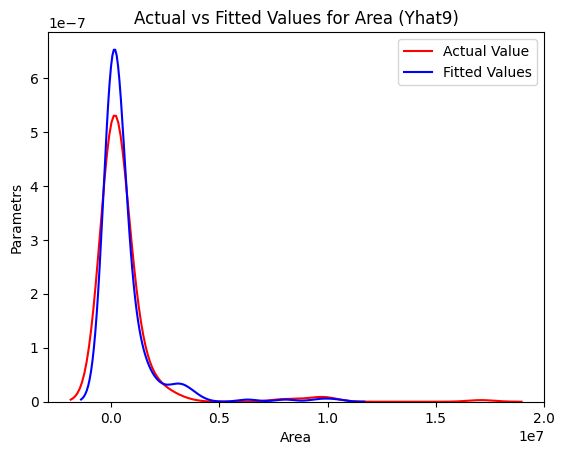

In [127]:
sns.distplot(y, hist=False, color="r", label="Actual Value")

Yhat_predicted = Yhat9.predict(Z_pr)
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for Area (Yhat9)")
plt.xlabel("Area")
plt.ylabel("Parametrs")

plt.legend()

plt.show()
plt.close()

Бачимо, що підігнана модель можна вдосконалити, адже вона не надто добре накладається з реальними даними

C:\Users\Користувач\AppData\Local\Temp\ipykernel_11820\182951866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual Value")
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

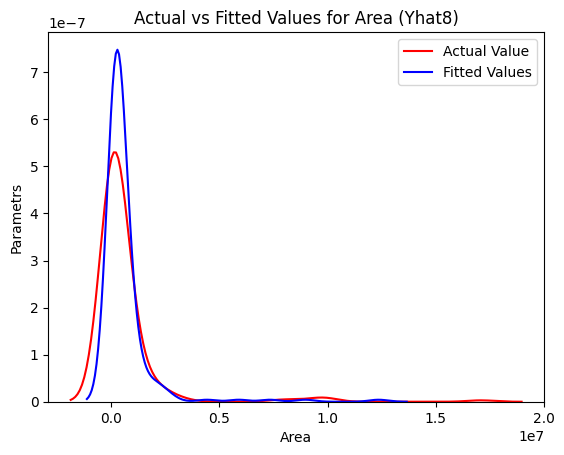

In [128]:
sns.distplot(y, hist=False, color="r", label="Actual Value")

Yhat_predicted = p8(x2)
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for Area (Yhat8)")
plt.xlabel("Area")
plt.ylabel("Parametrs")

plt.legend()

plt.show()
plt.close()

Бачимо, що підігнана модель можна вдосконалити, адже вона не надто добре накладається з реальними даними, візуально дуже схоже з діаграмою, отриманою при візуалізації Yhat9

C:\Users\Користувач\AppData\Local\Temp\ipykernel_11820\162733355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual Value")
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

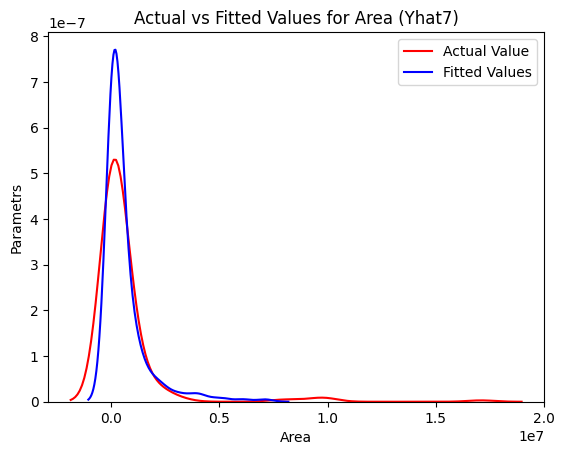

In [129]:
sns.distplot(y, hist=False, color="r", label="Actual Value")

Yhat_predicted = p7(x1)
sns.distplot(Yhat_predicted, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for Area (Yhat7)")
plt.xlabel("Area")
plt.ylabel("Parametrs")

plt.legend()

plt.show()
plt.close()

Візуально, показує найгірший результат серед всіх 3 моделей

# 3) Оцінка якостей моделей

$$
Yhat7 = a + b_1 X_1 + b_2 X_1^2 + b_3 X_1^3  
$$

In [130]:
print("R-squared score for polynomial fit Yhat7:", r2_score(y, p7(x1)))

R-squared score for polynomial fit Yhat7: 0.3362811344624962


In [132]:
Yhat7_pred = p7(x1)
print("Mean Squared Error (MSE) for polynomial fit Yhat7:", mean_squared_error(y, Yhat7_pred))

Mean Squared Error (MSE) for polynomial fit Yhat7: 2207242190546.4736


$$
Yhat8 = a + b_1 X_2 + b_2 X_2^2 
$$

In [134]:
print("R-squared score for polynomial fit Yhat8:", r2_score(y, p8(x2)))

R-squared score for polynomial fit Yhat8: 0.48626558152005894


In [135]:
Yhat8_pred = p8(x2)
print("Mean Squared Error (MSE) for polynomial fit Yhat8:", mean_squared_error(y, Yhat8_pred))

Mean Squared Error (MSE) for polynomial fit Yhat8: 1708458719621.4182


$$
Yhat9 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [138]:
r_squared = Yhat9.score(Z_pr, df[['Area']])
print("R-squared score for Yhat9:", r_squared)

R-squared score for Yhat9: 0.5522722455242688


In [139]:
Yhat9_pred = Yhat9.predict(Z_pr)
print("Mean Squared Error (MSE) for Yhat9:", mean_squared_error(df[['Area']], Yhat9_pred))

Mean Squared Error (MSE) for Yhat9: 1488949072974.0686


<h4>Підіб'ємо підсумки </h4>

<p>Polynomial Fit <b>Yhat7</b>: використовує Population як змінну-предиктор для Area.
<ul>
    <li><b>R-squared:</b> 0.3362811344624962</li>
    <li><b>MSE:</b> 2207242190546.4736 </li>
</ul>
<p>Polynomial Fit <b>Yhat8</b>: використовує CO2 emission як змінну-предиктор для CO2 Area.
<ul>
    <li><b>R-squared:</b> 0.48626558152005894</li>
    <li><b>MSE:</b> 1708458719621.4182</li>
</ul>

<p>Multiple Polynomial Fit <b>Yhat9</b>: використовує Population та CO2 emission як змінну-предиктор для Area.
<ul>
    <li><b>R-squared:</b> 0.5522722455242688</li>
    <li><b>MSE:</b> 1488949072974.0686</li>
</ul>

<h4>Висновок</h4>
<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Yhat9 - множинна поліноміальна регресія 2-го ступеня є найкращою моделлю</b> для прогнозування 'Area' на основі нашого набору даних серед досліджуваних моделей, адже має найкращу комбінацію R-squared і MSE. Його R-squared є найвищим серед усіх моделей, у той же час як MSE є найнижчим серед усіх моделей.</p>

<h2>Виконав студент групи ІП-21<br>  Пізнак Роман</h2>